#### Preliminary Analysis for Hacking for Defense<br/>Cyber Risk Management and Prioritization<br/>3/30/22

Preliminary analysis looking at a contract with the Raytheon Company for the development of hypersonic missiles.
We analyze the subcontracts within the primary award to Raytheon and consider groupings by various variables to observe average subward amounts and total number of subawards.

In [1]:
# Import necessary Python modules.
import pandas as pd
import missingno as miss
from plotnine import *
import numpy as np
import warnings

# Add additional settings to notebook.
warnings.filterwarnings("ignore")

In [2]:
# Read in the hypersonics contract data.
data_full = pd.read_csv("../data/Contract_HR001117C0025_Sub-Awards_1.csv")

In [3]:
# Ensure the data was loaded properly.
data_full.head()

,prime_award_unique_key,prime_award_piid,prime_award_parent_piid,prime_award_amount,prime_award_disaster_emergency_fund_codes,prime_award_outlayed_amount_funded_by_COVID-19_supplementals,prime_award_obligated_amount_funded_by_COVID-19_supplementals,prime_award_base_action_date,prime_award_base_action_date_fiscal_year,prime_award_latest_action_date,...,subawardee_highly_compensated_officer_2_name,subawardee_highly_compensated_officer_2_amount,subawardee_highly_compensated_officer_3_name,subawardee_highly_compensated_officer_3_amount,subawardee_highly_compensated_officer_4_name,subawardee_highly_compensated_officer_4_amount,subawardee_highly_compensated_officer_5_name,subawardee_highly_compensated_officer_5_amount,usaspending_permalink,subaward_fsrs_report_last_modified_date
0,CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-,HR001117C0025,NaN,174746702,NaN,NaN,NaN,10/31/16,2017,9/15/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_HR0...,2021-11-16 13:35:00+00
1,CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-,HR001117C0025,NaN,174746702,NaN,NaN,NaN,10/31/16,2017,9/15/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_HR0...,2020-11-17 10:56:12+00
2,CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-,HR001117C0025,NaN,174746702,NaN,NaN,NaN,10/31/16,2017,9/15/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_HR0...,2020-11-17 10:56:12+00
3,CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-,HR001117C0025,NaN,174746702,NaN,NaN,NaN,10/31/16,2017,9/15/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_HR0...,2021-11-16 13:35:00+00
4,CONT_AWD_HR001117C0025_9700_-NONE-_-NONE-,HR001117C0025,NaN,174746702,NaN,NaN,NaN,10/31/16,2017,9/15/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_HR0...,2021-11-16 13:35:00+00


In [4]:
# Examine the dimensionality of the data.
data_full.shape

(348, 105)

In [5]:
# Observe all columns that have an integer value.
(pd
 .DataFrame({"columns": (data_full
                         .select_dtypes(include = ["int", "float"])
                         .columns
                        )})
 .sort_values(by = ["columns"])
)

,columns
1,prime_award_amount
6,prime_award_awarding_agency_code
4,prime_award_base_action_date_fiscal_year
7,prime_award_funding_agency_code
5,prime_award_latest_action_date_fiscal_year
15,prime_award_naics_code
3,prime_award_obligated_amount_funded_by_COVID-1...
2,prime_award_outlayed_amount_funded_by_COVID-19...
0,prime_award_parent_piid
13,prime_award_primary_place_of_performance_addre...


In [6]:
# Exmine columns of interest.
data_interest = data_full[["prime_award_awarding_sub_agency_name", 
                           "prime_award_awarding_office_code", 
                           "prime_award_awarding_office_name",
                           "prime_award_funding_sub_agency_name",
                           "prime_award_funding_office_name",
                           "prime_awardee_dba_name",
                           "prime_awardee_parent_name",
                           "prime_awardee_business_types",
                           "prime_award_project_title",
                           "subaward_fsrs_report_year",
                           "subaward_fsrs_report_month",
                           "subaward_amount",
                           "subaward_action_date",
                           "subaward_action_date_fiscal_year",
                           "subawardee_dba_name",
                           "subawardee_name",
                           "subawardee_parent_name",
                           "subawardee_duns",
                           "subawardee_business_types",
                           "subaward_description"
                          ]]

In [7]:
# Collect variables to convert to categories.
cols_to_convert = pd.DataFrame({"columns" : data_interest.select_dtypes(include = ["int", "object"]).columns})

# Remove "subaward_amount" from columns to convert and make into list to push into for loop.
cols_to_convert = cols_to_convert[~cols_to_convert["columns"].str.contains("amount")]["columns"].values.tolist()

In [8]:
# Convert variables to categories.
for column in cols_to_convert:
    data_interest[column] = data_interest[column].astype("category")

In [9]:
# Examine the attribute types of the data.
data_interest.dtypes

prime_award_awarding_sub_agency_name    category
prime_award_awarding_office_code        category
prime_award_awarding_office_name        category
prime_award_funding_sub_agency_name     category
prime_award_funding_office_name         category
prime_awardee_dba_name                  category
prime_awardee_parent_name               category
prime_awardee_business_types            category
prime_award_project_title               category
subaward_fsrs_report_year               category
subaward_fsrs_report_month              category
subaward_amount                            int64
subaward_action_date                    category
subaward_action_date_fiscal_year        category
subawardee_dba_name                     category
subawardee_name                         category
subawardee_parent_name                  category
subawardee_duns                         category
subawardee_business_types               category
subaward_description                    category
dtype: object

<AxesSubplot:>

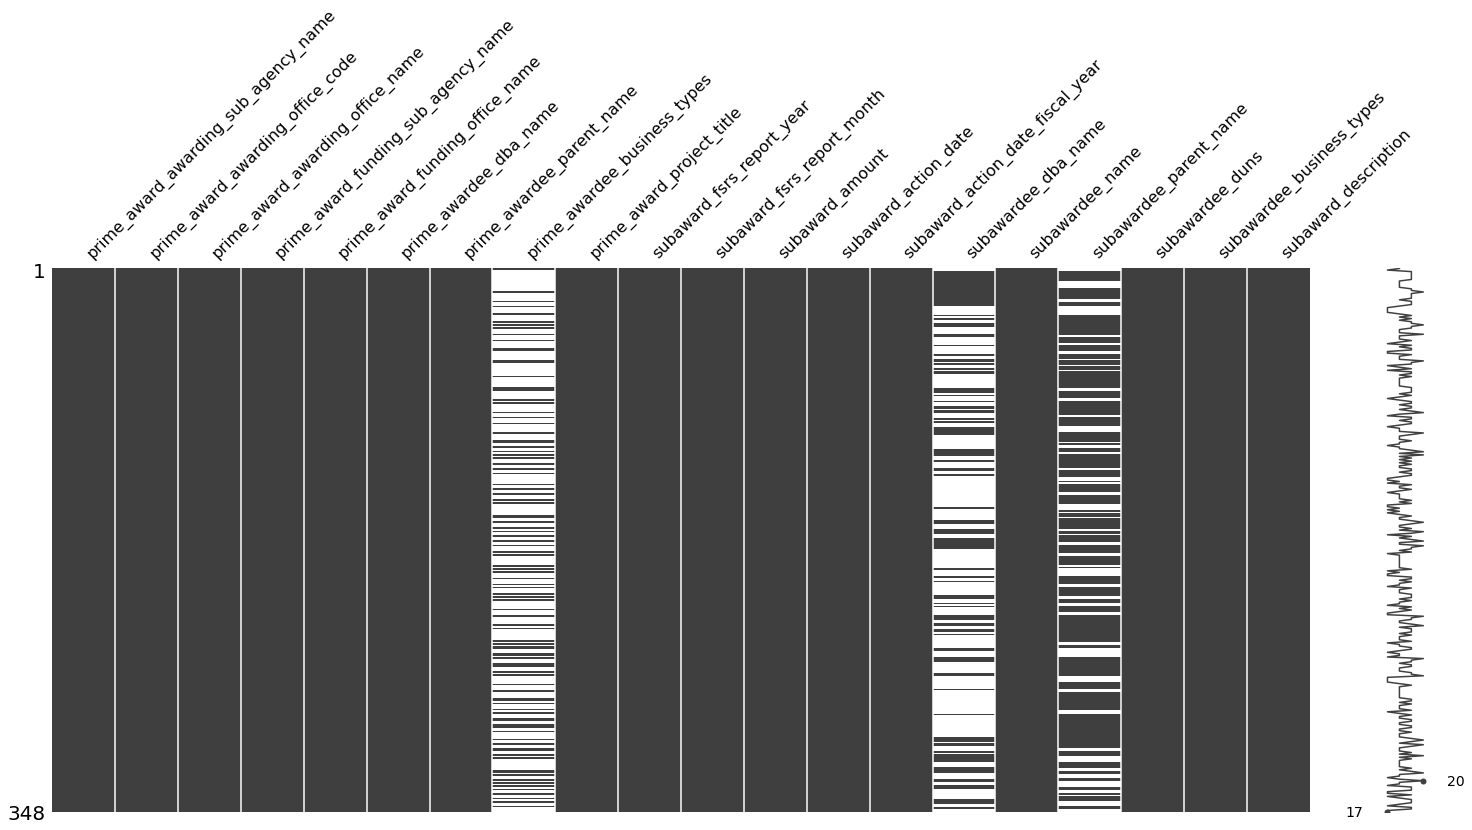

In [10]:
# We now check for missingness in the data.
miss.matrix(data_interest)

In [11]:
# First analysis: average and count of aubaward amount by type of subawarded business types.
analysis_1 = \
(data_interest[["subawardee_business_types", "subaward_amount"]]
 .groupby(["subawardee_business_types"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Awardee Business Types", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
)

# Save to CSV.
analysis_1.to_csv("results/h4d_subaward_amount_by_business_types.csv", index = False)

# Show results.
display(analysis_1)

,Sub-Awardee Business Types,Sub-Award Average Amount,Sub-Award Count
18,"For-Profit Organization,Manufacturer of Goods,...",10859129.67,18
14,"For-Profit Organization,Limited Liability Comp...",8085490.00,4
10,"For-Profit Organization,Foreign Owned and Loca...",4003305.32,22
12,"For-Profit Organization,Limited Liability Company",2940585.55,11
17,"For-Profit Organization,Manufacturer of Goods",1930940.60,140
21,"For-Profit Organization,Manufacturer of Goods,...",448110.40,5
13,"For-Profit Organization,Limited Liability Comp...",391588.96,28
26,"For-Profit Organization,S Corporation,Veteran ...",388847.58,12
3,"Contracts and Grants,For-Profit Organization,M...",258706.22,9
24,"For-Profit Organization,Manufacturer of Goods,...",239815.77,13


In [12]:
# Second analysis: average and count of aubaward amount by type of subawarded description.
analysis_2 = \
(data_interest[["subaward_description", "subaward_amount"]]
 .groupby(["subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Award Description", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
)

# Save to CSV.
analysis_2.to_csv("results/h4d_subaward_amount_by_description.csv", index = False)

# Show results.
display(analysis_2)

,Sub-Award Description,Sub-Award Average Amount,Sub-Award Count
1,"Accelerometers, Amplifiers, Cable/CableAssyHV,...",61572908.00,2
2,"Accelerometers, CableMulticonductor.",54400000.00,2
0,"AC-DC Power Supplies, Adaptors, Backshells, Ca...",48800000.00,2
3,"AlarmBuzzerSensor, EnvTestEq(Shock/etc).",41600000.00,2
4,"Alum Invest Casting, NRE - Engineering, NRE - ...",33150000.00,2
...,...,...,...
68,Testing (Non-Prod).,31522.50,4
69,Time & Material,30700.88,8
70,Transducers.,30299.00,2
71,Transmitters.,28856.50,2


In [13]:
# Third analysis: average and count of subaward amount by subawardee.
analysis_3 = \
(data_interest[["subawardee_name", "subaward_amount"]]
 .groupby(["subawardee_name"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Awardee Name", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
)

# Save to CSV.
analysis_3.to_csv("results/h4d_subaward_amount_by_name.csv", index = False)

# Show results.
display(analysis_3)

,Sub-Awardee Name,Sub-Award Average Amount,Sub-Award Count
23,"DIVERSIFIED TECHNICAL SYSTEMS, INC.",48800000.00,2
27,DYTRAN INSTRUMENTS INC.,48450570.33,3
58,"PCB PIEZOTRONICS, INC.",36302067.67,3
77,"UNI-CAST, LLC",31200000.00,1
47,"MEASUREMENT SPECIALTIES, INC.",10472334.38,8
...,...,...,...
48,"MICRO CRAFT, INC.",34401.50,6
73,"TEVET, LLC",33416.50,2
29,ELEMENT MATERIALS TECHNOLOGY CINCINNATI INC.,31464.50,2
22,"DESIGNLINX HARDWARE SOLUTIONS, LLC",31004.00,1


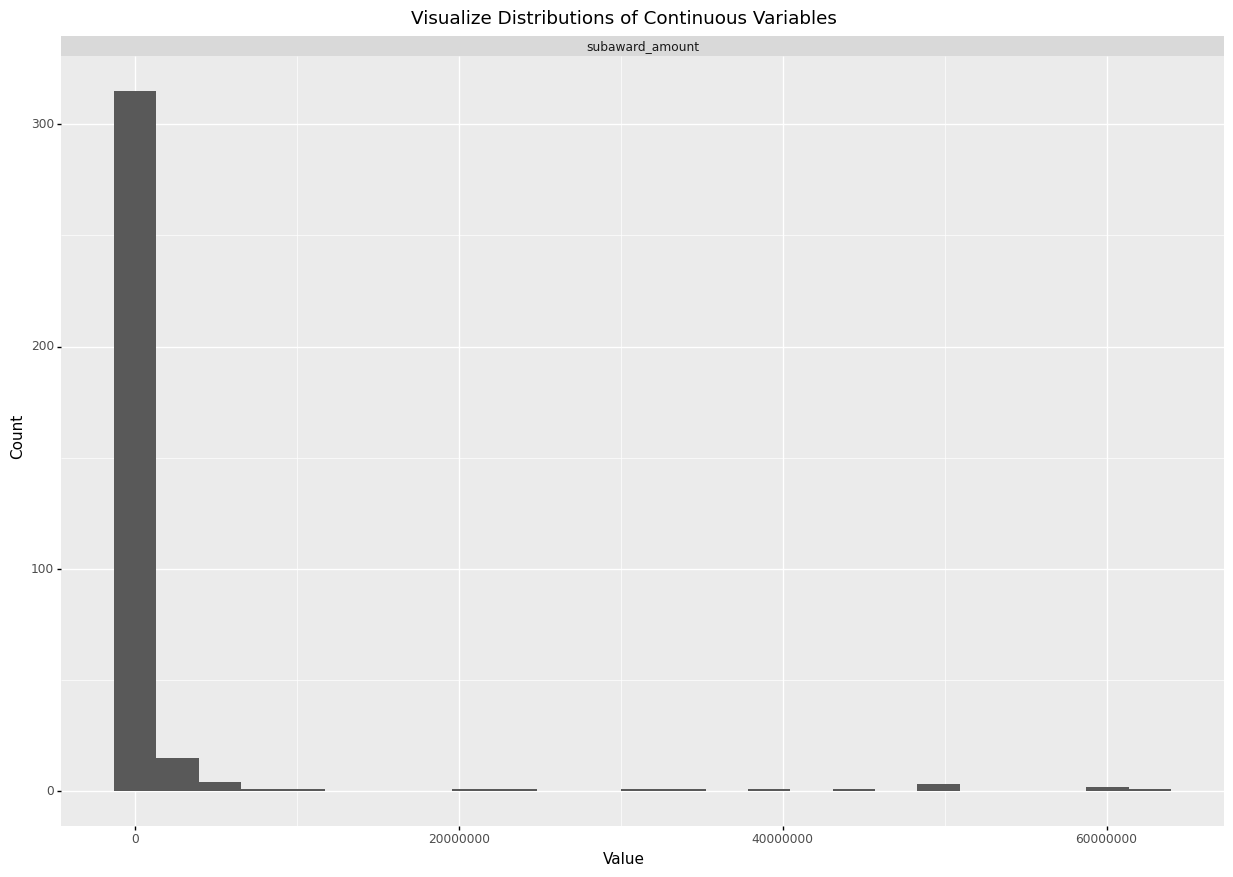

<ggplot: (8761893512692)>

In [14]:
# Identify the continuous variables (int and float).
d = data_interest.select_dtypes(include = ["int", "float"]).melt()

# Plot the continous variables.
(
    ggplot(d, aes(x = "value")) +
    geom_histogram(bins = 25) +
    facet_wrap("variable", scales = "free") +
    theme(figure_size = (15, 10),
          subplots_adjust = {"wspace" : 0.25, "hspace" : 0.25}) +
    labs(x = "Value", y = "Count", title = "Visualize Distributions of Continuous Variables")
)

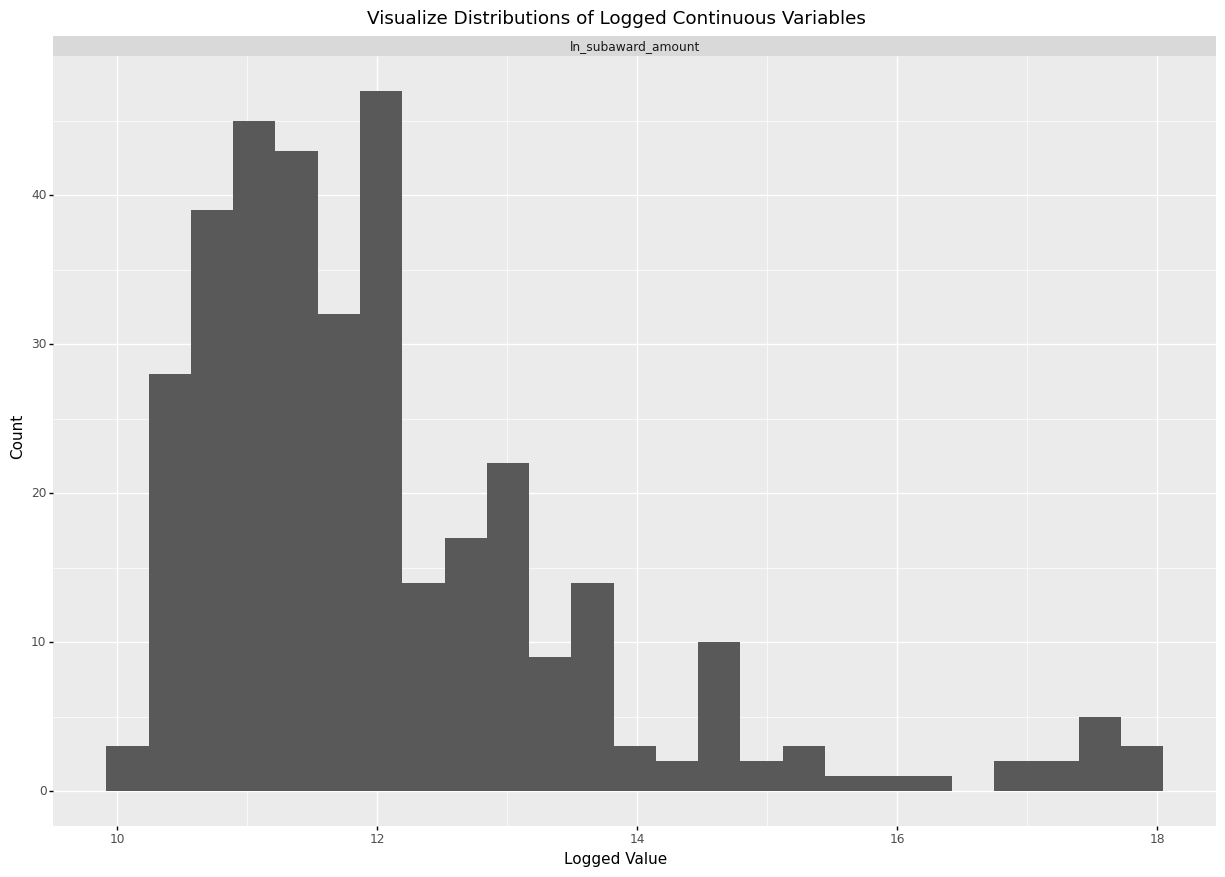

<ggplot: (8761843752223)>

In [15]:
# Take a copy of the training data.
d = data_interest.copy()

# Log transform *Age*.
d["ln_subaward_amount"] =  np.log(d["subaward_amount"] + 1)

# We observe the logged continuous variables to ensure we have transformed them properly.

# Identify the logged continuous variables.
d_ln = d.loc[:, d.columns.str.startswith("ln_")].melt()

# Plot the logged continuous variables.
(
    ggplot(d_ln, aes(x = "value")) +
    geom_histogram(bins = 25) +
    facet_wrap("variable", scales = "free") +
    theme(figure_size = (15, 10),
          subplots_adjust = {"wspace" : 0.25, "hspace" : 0.25}) +
    labs(x = "Logged Value", y = "Count", title = "Visualize Distributions of Logged Continuous Variables")
)

## Probably need to convert *subaward_amount* to ordinal since the distribution is still skewed after log transform.

In [16]:
# Identify unique values for subaward amounts.
data_interest["subaward_amount"].unique()

array([62696821, 60448995, 60000000, 48800000, 44000000, 39200000,
       35100000, 31200000, 22205895, 21000000, 11200000,  8000000,
        6000000,  4945440,  4866781,  4000000,  3190801,  2979529,
        2657424,  2356023,  2328936,  2176384,  2148728,  1997588,
        1942520,  1935479,  1919219,  1511333,  1331612,  1147265,
         932473,   928445,   926271,   924640,   900319,   893366,
         891828,   853476,   784267,   754666,   712889,   697020,
         673672,   638100,   620396,   584200,   509049,   504312,
         500000,   499468,   494312,   486590,   461160,   454938,
         451140,   439350,   434734,   426576,   418147,   409848,
         405000,   403204,   401171,   398019,   377000,   356444,
         356100,   352687,   350664,   338484,   323145,   321964,
         314154,   297852,   292100,   286176,   282200,   265477,
         230976,   230580,   229838,   225291,   209036,   203064,
         199862,   198546,   197547,   197472,   194073,   193

In [17]:
# Identify unique values for prime award amount given to Raytheon.
data_full["prime_award_amount"].unique()

array([174746702])

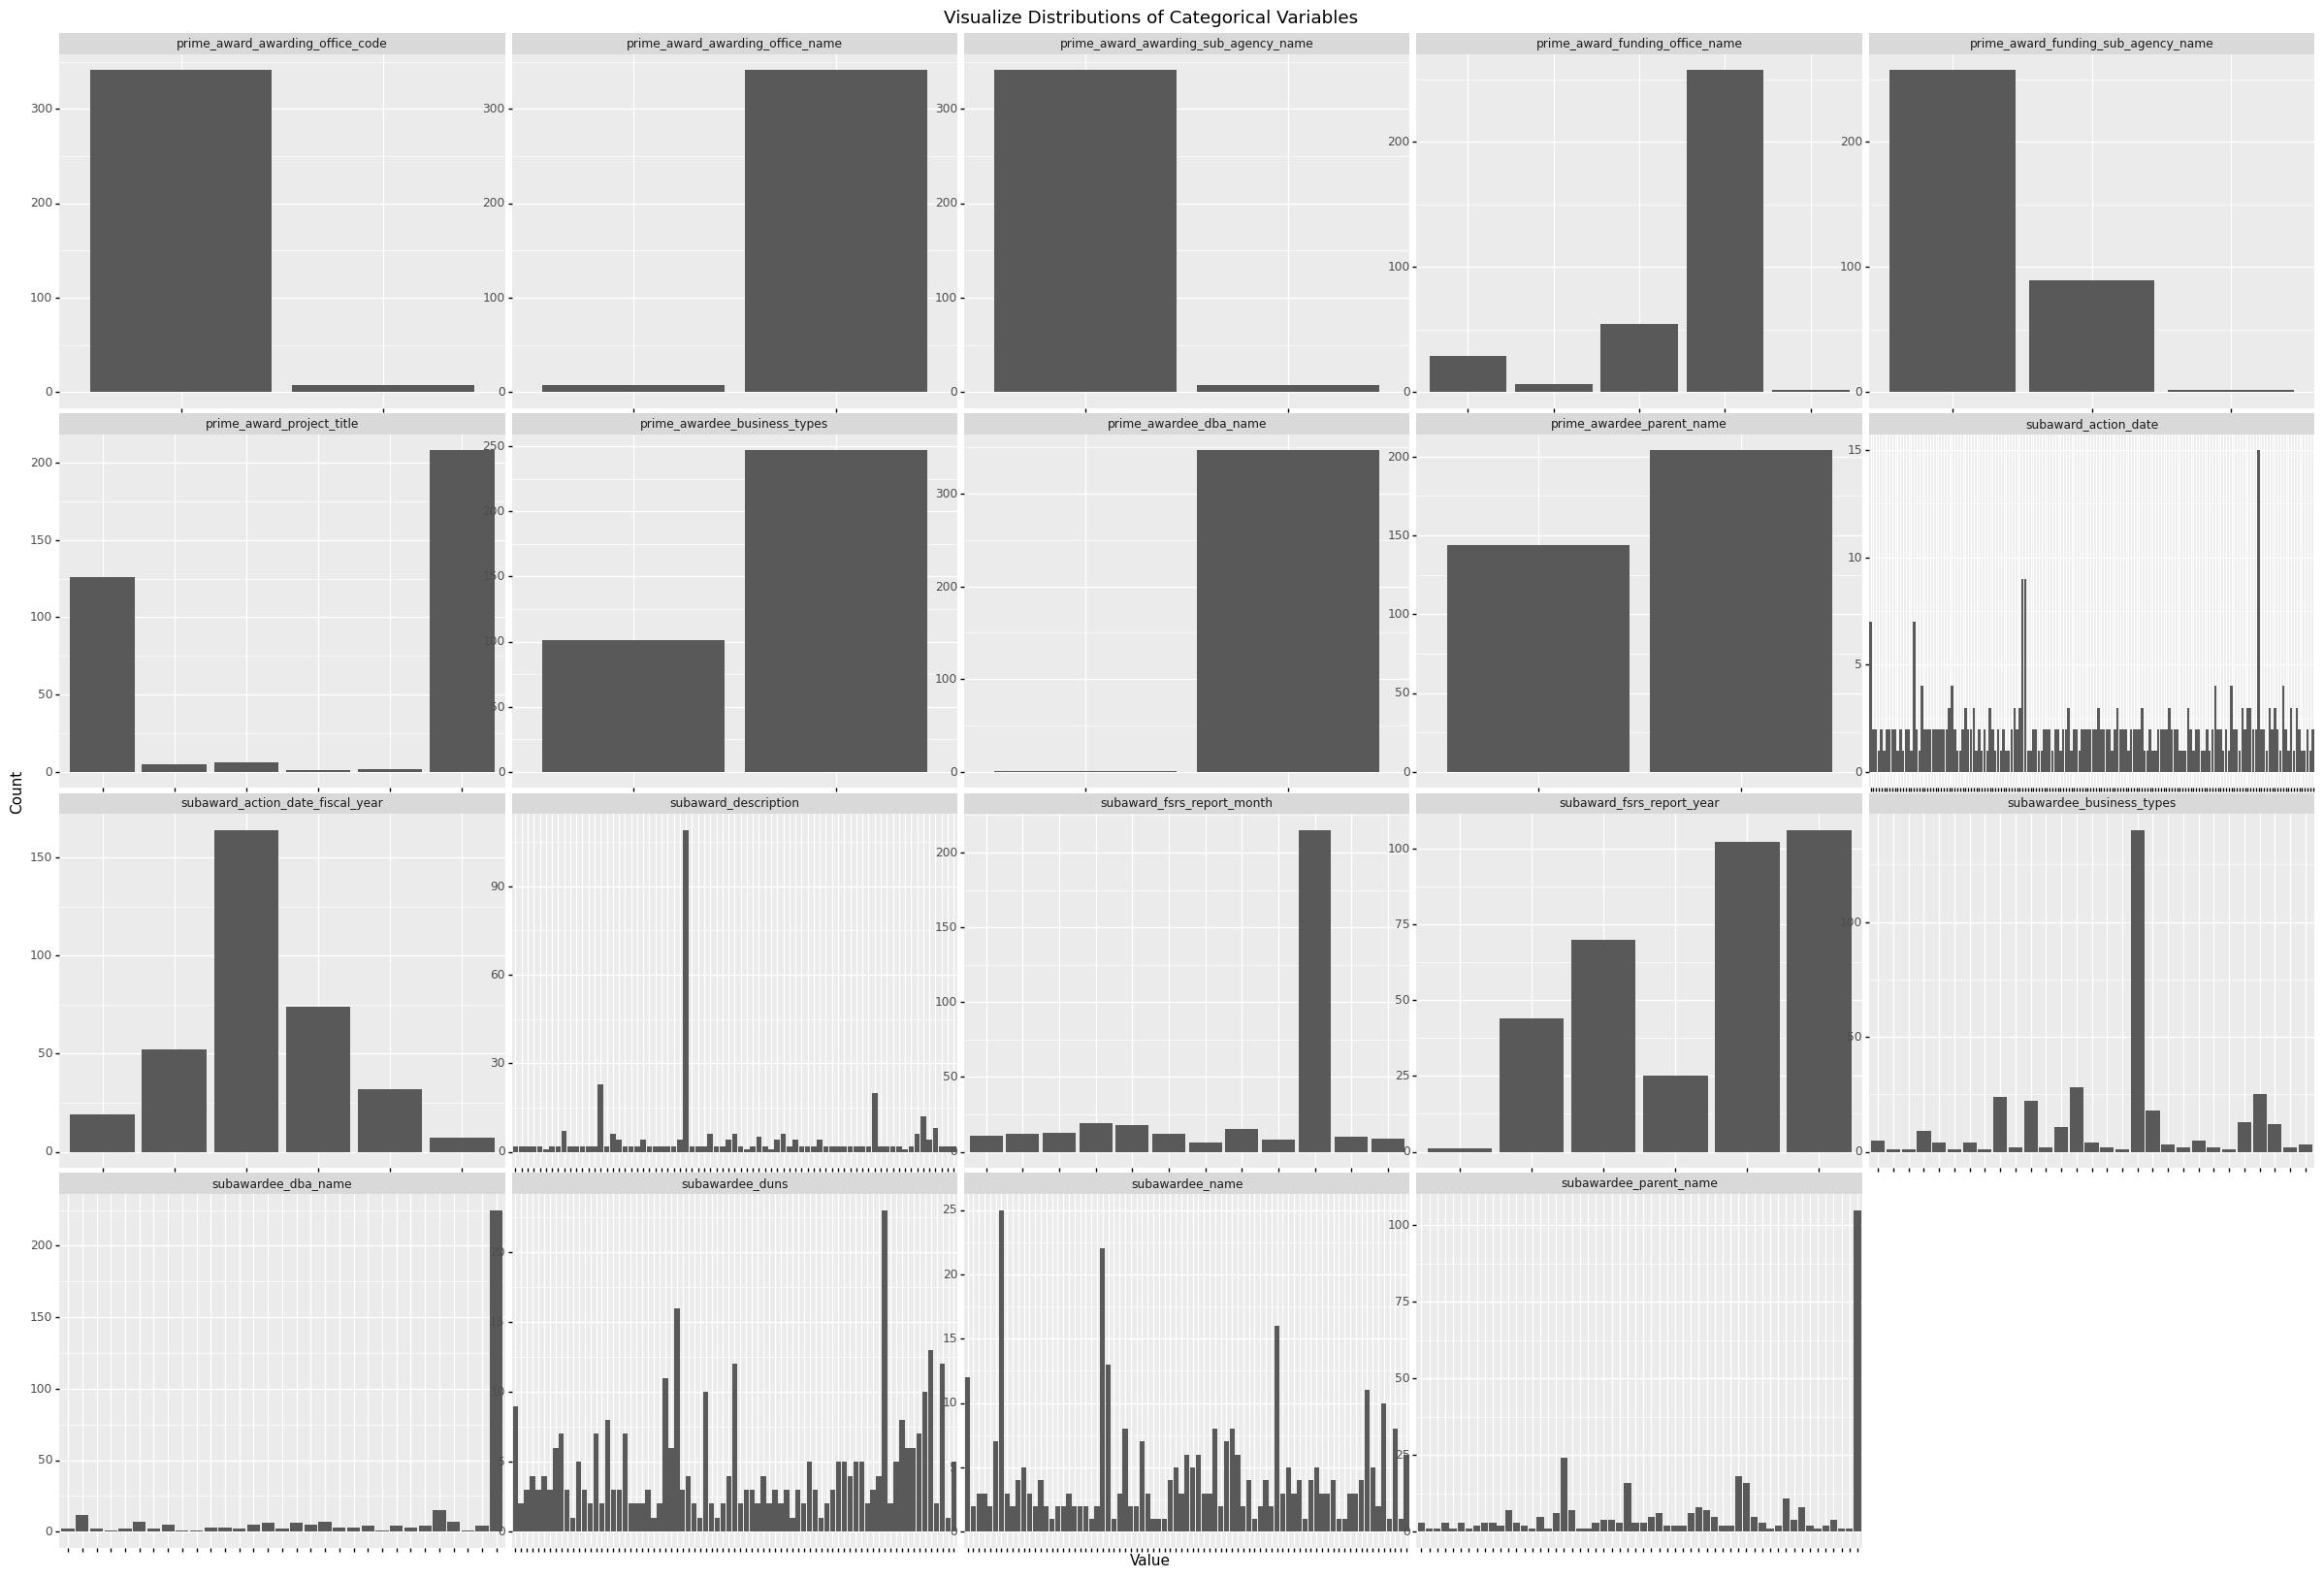

<ggplot: (8761893513608)>

In [18]:
# Now we consider the categorial predictors.

# Identify the categorial variables.
d = data_interest.select_dtypes(include = "category").melt()

# Plot the continuous variables.
(
    ggplot(d, aes(x = "value")) +
    geom_bar() +
    facet_wrap("variable", scales = "free") +
    theme(figure_size = (30, 20),
          axis_text_x = element_blank()) + # Remove labels for now - element_text(rotation = 45, hjust = 1)) +
    labs(x = "Value", y = "Count", title = "Visualize Distributions of Categorical Variables")
)